## Red neuronal
Las redes neuronales son modelos simples del funcionamiento del sistema nervioso. Las unidades básicas son las neuronas, que generalmente se organizan en capas, como se muestra en la siguiente ilustración.

![title](https://www.ibm.com/support/knowledgecenter/es/SS3RA7_sub/modeler_mainhelp_client_ddita/clementine/images/nn.jpg)


Una red neuronal es un modelo simplificado que emula el modo en que el cerebro humano procesa la información: Funciona simultaneando un número elevado de unidades de procesamiento interconectadas que parecen versiones abstractas de neuronas.

Las unidades de procesamiento se organizan en capas. Hay tres partes normalmente en una red neuronal : una capa de entrada, con unidades que representan los campos de entrada; una o varias capas ocultas; y una capa de salida, con una unidad o unidades que representa el campo o los campos de destino. Las unidades se conectan con fuerzas de conexión variables (o ponderaciones). Los datos de entrada se presentan en la primera capa, y los valores se propagan desde cada neurona hasta cada neurona de la capa siguiente. al final, se envía un resultado desde la capa de salida.

La red aprende examinando los registros individuales, generando una predicción para cada registro y realizando ajustes a las ponderaciones cuando realiza una predicción incorrecta. Este proceso se repite muchas veces y la red sigue mejorando sus predicciones hasta haber alcanzado uno o varios criterios de parada.

Al principio, todas las ponderaciones son aleatorias y las respuestas que resultan de la red son, posiblemente, disparatadas. La red aprende a través del entrenamiento. Continuamente se presentan a la red ejemplos para los que se conoce el resultado, y las respuestas que proporciona se comparan con los resultados conocidos. La información procedente de esta comparación se pasa hacia atrás a través de la red, cambiando las ponderaciones gradualmente. A medida que progresa el entrenamiento, la red se va haciendo cada vez más precisa en la replicación de resultados conocidos. Una vez entrenada, la red se puede aplicar a casos futuros en los que se desconoce el resultado.

Para este experimento vamos a comenzar importando las librerias que utilizaremos para este ejercicio, ahora usaremos tensorflow, una libreria que permite de manera rapida crear arquitecturas de redes neuronales para su entrenamiento.

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

Cargamos el dataset de iris, esto se puede realizar a traves de lecturas del dataset individual, asi como tambien se puede realizar de manera separada utilizando el dataset directamente de sklearn

In [5]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Hacemos one-hot encoding de las etiquetas, esto es, cambiar la manera en la que describimos las etiquetas, enigual de utilizar el texto que normalmente se le da, o "nombre" vamos a utilizar tres valores diferentes para definir cada una de las posibles clases, creando un vector de tres espacios
Ej. Iris Setosa = [1,0,0]

In [6]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)# drop old label
df.drop(['label'], axis=1, inplace=True)

df.head()
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1
149,5.9,3.0,5.1,1.8,0,0,1


Separamos los datos entre, caracteristicas (X) y etiquetas (Y)

In [7]:
# Creating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

Separamos ambos conjuntos (X,Y) en diferentes sub-conjuntos, uno de entrenamiento y otro de validacion.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)

print(y_test)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


Declaramos el modelo de la red neuronal que vamos a utilizar, para esto debemos observar 2 cosas principalmente, la primera es la dimension de las caracteristicas de los datos que buscamos etiquetar (X) y por ultimo la dimension de las etiquetas que tenemos disponibles (Y), estas dimensiones deben de coincidir con nuestra capa de entrada (X) y capa de salida (Y) respectivamente.

In [30]:
model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(4,)), #Input
    keras.layers.Dense(300, activation='relu'), #Hidden
    keras.layers.Dense(3, activation='softmax') #Output
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 300)               1500      
                                                                 
 dense_14 (Dense)            (None, 3)                 903       
                                                                 
Total params: 2423 (9.46 KB)
Trainable params: 2423 (9.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compilamos el modelo que acabamos de declarar, esto es, le agregamos el algoritmo de optimizacion que utilizara el modelo para alcanzar la "convergencia", existen una gran cantidad de algoritmos de optimizacion y cada uno tiene sus caracteristicas y sus usos exclusivos, no existe el hilo negro.

De la misma manera agregamos tambien las metricas que utilizaremos para evaluar el modelo y la funcion de perdida.

In [31]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Entrenamos el modelo, utilizando los datos de entrenamiento

In [32]:
history = model.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 20,
                    validation_split=0.2
                   )

Epoch 1/20
2/2 [==============================] - 1s 241ms/step - loss: 1.1970 - accuracy: 0.2472 - val_loss: 1.0925 - val_accuracy: 0.4348
Epoch 2/20
2/2 [==============================] - 0s 34ms/step - loss: 1.1014 - accuracy: 0.2697 - val_loss: 1.1077 - val_accuracy: 0.4348
Epoch 3/20
2/2 [==============================] - 0s 36ms/step - loss: 1.0913 - accuracy: 0.3146 - val_loss: 1.1012 - val_accuracy: 0.4348
Epoch 4/20
2/2 [==============================] - 0s 36ms/step - loss: 1.0860 - accuracy: 0.3596 - val_loss: 1.1259 - val_accuracy: 0.4348
Epoch 5/20
2/2 [==============================] - 0s 36ms/step - loss: 1.0854 - accuracy: 0.3596 - val_loss: 1.1733 - val_accuracy: 0.4348
Epoch 6/20
2/2 [==============================] - 0s 35ms/step - loss: 1.0813 - accuracy: 0.3371 - val_loss: 1.1413 - val_accuracy: 0.4348
Epoch 7/20
2/2 [==============================] - 0s 54ms/step - loss: 1.0797 - accuracy: 0.3596 - val_loss: 1.1640 - val_accuracy: 0.1304
Epoch 8/20
2/2 [==========

Con la informacion del entrenamiento entonces, podemos graficar las diferentes metricas utilizadas para medir el modelo de reconocimiento

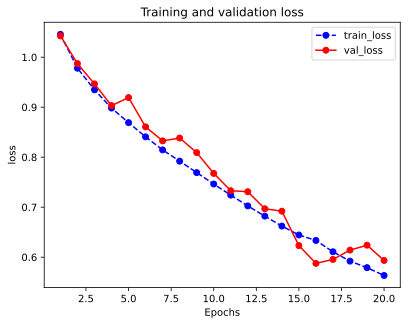

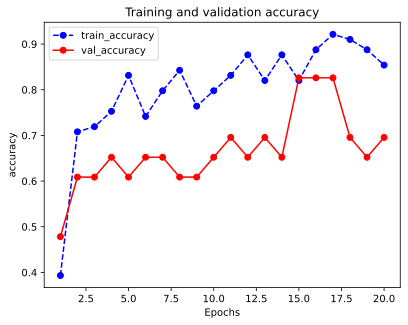

In [24]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

In [19]:
model.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.8388 - accuracy: 0.5263


[0.8387653231620789, 0.5263158082962036]

In [20]:
model.predict([[5.1,3.5,1.4,2]])
#5.1	3.5	1.4	0.2	setosa

1/1 [==============================] - 0s 76ms/step


array([[0.28025094, 0.4336264 , 0.28612268]], dtype=float32)

Para un efecto mas grafico pueden seguir [esta liga](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.64729&showTestData=false&discretize=false&percTrainData=50&x=false&y=false&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false) en donde pueden observar como funcionan diferentes tipos de filtros sobre un tipo de dato aplicado en redes neuronales